In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
from scipy.io.matlab.mio import loadmat, savemat
import numpy as np
from PIL import Image
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch import nn, optim
import torch.nn.functional as nnf
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torchvision.models import resnet50, ResNet50_Weights
from utils import get_performance

C:\Users\Nassim\AppData\Local\Temp\ipykernel_18216\2950933711.py:11: DeprecationWarning: Please use `loadmat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  from scipy.io.matlab.mio import loadmat, savemat
C:\Users\Nassim\AppData\Local\Temp\ipykernel_18216\2950933711.py:11: DeprecationWarning: Please use `savemat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  from scipy.io.matlab.mio import loadmat, savemat


# Loading data and functions: 

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [4]:
weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()
num_classes = 8

In [5]:
path_pair_img = '../data/photoshoptest'
dataset = datasets.ImageFolder(root=path_pair_img, transform=preprocess)

In [6]:
lengths = [0.1,0.9]
_, sub_dataset_1 = torch.utils.data.random_split(dataset, lengths)
_, sub_dataset_2 = torch.utils.data.random_split(dataset, lengths)
_, sub_dataset_3 = torch.utils.data.random_split(dataset, lengths)

In [5]:
path_pair_img = '../data/photoshoptest_handmade'
dataset_handmade = datasets.ImageFolder(root=path_pair_img, transform=preprocess)

In [6]:
lengths = [0.1,0.9]
_, sub_dataset_handmade_1 = torch.utils.data.random_split(dataset_handmade, lengths)
_, sub_dataset_handmade_2 = torch.utils.data.random_split(dataset_handmade, lengths)
_, sub_dataset_handmade_3 = torch.utils.data.random_split(dataset_handmade, lengths)

In [6]:
# RESNET NUMERO 1 : 
model_resnet_1 = resnet50(weights=ResNet50_Weights.DEFAULT)

num_features = model_resnet_1.fc.in_features

model_resnet_1.fc = nn.Sequential(
    nn.Linear(num_features, 1000),  # New layer with 1000 outputs (matches pre-trained model)
    nn.ReLU(),                       
    nn.Linear(1000, num_classes)    # Final layer with 8 outputs for your classification task
)

model_resnet_1 = model_resnet_1.cuda()

In [7]:
# RESNET NUMERO 2 : 
model_resnet_2 = resnet50(weights=ResNet50_Weights.DEFAULT)

num_features = model_resnet_2.fc.in_features

model_resnet_2.fc = nn.Sequential(
    nn.Linear(num_features, 1000),  # New layer with 1000 outputs (matches pre-trained model)
    nn.ReLU(),                       
    nn.Linear(1000, num_classes)    # Final layer with 8 outputs for your classification task
)

model_resnet_2 = model_resnet_2.cuda()

In [8]:
# RESNET NUMERO 3 : 
model_resnet_3 = resnet50(weights=ResNet50_Weights.DEFAULT)

num_features = model_resnet_3.fc.in_features

model_resnet_3.fc = nn.Sequential(
    nn.Linear(num_features, 1000),  # New layer with 1000 outputs (matches pre-trained model)
    nn.ReLU(),                       
    nn.Linear(1000, num_classes)    # Final layer with 8 outputs for your classification task
)

model_resnet_3 = model_resnet_3.cuda()

# Training the 3 resnet models

## Pretraining on player dataset

In [12]:
# Training model_resnet_1
epochs = 20
torch.cuda.empty_cache()

for i in range(1):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_resnet_1.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")

    train_dataloader = torch.utils.data.DataLoader(
        sub_dataset_1,
        batch_size=5,
        shuffle=True
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_resnet_1, loss_fn, optimizer)
    print("Done!")

torch.save(model_resnet_1.state_dict(), "./model_resnet_1")

CrossValidation : 0
-------------------------------

Epoch 1
-------------------------------
loss: 2.064304  [    5/ 5918]
loss: 2.076878  [  505/ 5918]
loss: 1.796142  [ 1005/ 5918]
loss: 1.714366  [ 1505/ 5918]
loss: 2.045008  [ 2005/ 5918]
loss: 1.344280  [ 2505/ 5918]
loss: 1.050765  [ 3005/ 5918]
loss: 0.915165  [ 3505/ 5918]
loss: 0.807661  [ 4005/ 5918]
loss: 1.548192  [ 4505/ 5918]
loss: 0.939444  [ 5005/ 5918]
loss: 1.350974  [ 5505/ 5918]
Epoch 2
-------------------------------
loss: 0.916979  [    5/ 5918]
loss: 1.275031  [  505/ 5918]
loss: 1.221728  [ 1005/ 5918]
loss: 0.526090  [ 1505/ 5918]
loss: 1.748123  [ 2005/ 5918]
loss: 0.679456  [ 2505/ 5918]
loss: 1.305757  [ 3005/ 5918]
loss: 1.146522  [ 3505/ 5918]
loss: 1.117111  [ 4005/ 5918]
loss: 1.213879  [ 4505/ 5918]
loss: 0.286588  [ 5005/ 5918]
loss: 0.533095  [ 5505/ 5918]
Epoch 3
-------------------------------
loss: 1.394778  [    5/ 5918]
loss: 1.664084  [  505/ 5918]
loss: 1.549467  [ 1005/ 5918]
loss: 1.391576  [

In [10]:
# Training model_resnet_2
epochs = 20
torch.cuda.empty_cache()

for i in range(1):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_resnet_2.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")

    train_dataloader = torch.utils.data.DataLoader(
        sub_dataset_2,
        batch_size=5,
        shuffle=True
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_resnet_2, loss_fn, optimizer)
    print("Done!")

torch.save(model_resnet_2.state_dict(), "./model_resnet_2")

CrossValidation : 0
-------------------------------

Epoch 1
-------------------------------
loss: 2.112760  [    5/ 5918]
loss: 1.774462  [  505/ 5918]
loss: 1.760193  [ 1005/ 5918]
loss: 1.065309  [ 1505/ 5918]
loss: 1.332191  [ 2005/ 5918]
loss: 1.377751  [ 2505/ 5918]
loss: 1.807282  [ 3005/ 5918]
loss: 1.107520  [ 3505/ 5918]
loss: 1.342763  [ 4005/ 5918]
loss: 1.269875  [ 4505/ 5918]
loss: 1.928030  [ 5005/ 5918]
loss: 0.764736  [ 5505/ 5918]
Epoch 2
-------------------------------
loss: 1.938804  [    5/ 5918]
loss: 1.024533  [  505/ 5918]
loss: 1.804874  [ 1005/ 5918]
loss: 1.096164  [ 1505/ 5918]
loss: 1.421016  [ 2005/ 5918]
loss: 1.574527  [ 2505/ 5918]
loss: 1.369840  [ 3005/ 5918]
loss: 1.827482  [ 3505/ 5918]
loss: 1.037951  [ 4005/ 5918]
loss: 1.130391  [ 4505/ 5918]
loss: 0.911781  [ 5005/ 5918]
loss: 1.027745  [ 5505/ 5918]
Epoch 3
-------------------------------
loss: 1.089186  [    5/ 5918]
loss: 0.691953  [  505/ 5918]
loss: 1.342141  [ 1005/ 5918]
loss: 0.665571  [

In [12]:
# Training model_resnet_3
epochs = 20
torch.cuda.empty_cache()

for i in range(1):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_resnet_3.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")

    train_dataloader = torch.utils.data.DataLoader(
        sub_dataset_3,
        batch_size=5,
        shuffle=True
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_resnet_3, loss_fn, optimizer)
    print("Done!")

torch.save(model_resnet_3.state_dict(), "./model_resnet_3")

CrossValidation : 0
-------------------------------

Epoch 1
-------------------------------
loss: 2.111452  [    5/ 5918]
loss: 2.075015  [  505/ 5918]
loss: 1.274922  [ 1005/ 5918]
loss: 1.956081  [ 1505/ 5918]
loss: 1.913835  [ 2005/ 5918]
loss: 1.114188  [ 2505/ 5918]
loss: 1.067612  [ 3005/ 5918]
loss: 1.155705  [ 3505/ 5918]
loss: 1.026302  [ 4005/ 5918]
loss: 1.083054  [ 4505/ 5918]
loss: 1.064315  [ 5005/ 5918]
loss: 1.096595  [ 5505/ 5918]
Epoch 2
-------------------------------
loss: 0.435737  [    5/ 5918]
loss: 0.739402  [  505/ 5918]
loss: 1.575951  [ 1005/ 5918]
loss: 1.201917  [ 1505/ 5918]
loss: 0.795482  [ 2005/ 5918]
loss: 0.948140  [ 2505/ 5918]
loss: 1.066380  [ 3005/ 5918]
loss: 1.625516  [ 3505/ 5918]
loss: 1.378128  [ 4005/ 5918]
loss: 1.170951  [ 4505/ 5918]
loss: 0.624294  [ 5005/ 5918]
loss: 2.989768  [ 5505/ 5918]
Epoch 3
-------------------------------
loss: 1.605987  [    5/ 5918]
loss: 0.458811  [  505/ 5918]
loss: 1.358380  [ 1005/ 5918]
loss: 1.162481  [

## Training on handmade dataset

In [8]:
# Retraining model_resnet_1
epochs = 20
torch.cuda.empty_cache()
model_resnet_1.load_state_dict(torch.load("./model_resnet_1"))

for i in range(1):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_resnet_1.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")

    train_dataloader = torch.utils.data.DataLoader(
        sub_dataset_handmade_1,
        batch_size=5,
        shuffle=True
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_resnet_1, loss_fn, optimizer)
    print("Done!")

torch.save(model_resnet_1.state_dict(), "./model_resnet_retrained_1")

CrossValidation : 0
-------------------------------

Epoch 1
-------------------------------
loss: 1.263558  [    5/  108]
Epoch 2
-------------------------------
loss: 1.094464  [    5/  108]
Epoch 3
-------------------------------
loss: 0.061689  [    5/  108]
Epoch 4
-------------------------------
loss: 0.025585  [    5/  108]
Epoch 5
-------------------------------
loss: 0.042639  [    5/  108]
Epoch 6
-------------------------------
loss: 0.086815  [    5/  108]
Epoch 7
-------------------------------
loss: 0.158233  [    5/  108]
Epoch 8
-------------------------------
loss: 0.115990  [    5/  108]
Epoch 9
-------------------------------
loss: 0.191921  [    5/  108]
Epoch 10
-------------------------------
loss: 0.015402  [    5/  108]
Epoch 11
-------------------------------
loss: 0.004042  [    5/  108]
Epoch 12
-------------------------------
loss: 0.008898  [    5/  108]
Epoch 13
-------------------------------
loss: 0.068041  [    5/  108]
Epoch 14
------------------------

In [10]:
# Retraining model_resnet_2
epochs = 20
torch.cuda.empty_cache()
model_resnet_2.load_state_dict(torch.load("./model_resnet_2"))

for i in range(1):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_resnet_2.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")

    train_dataloader = torch.utils.data.DataLoader(
        sub_dataset_handmade_2,
        batch_size=5,
        shuffle=True
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_resnet_2, loss_fn, optimizer)
    print("Done!")

torch.save(model_resnet_2.state_dict(), "./model_resnet_retrained_2")

CrossValidation : 0
-------------------------------

Epoch 1
-------------------------------
loss: 6.123389  [    5/  108]
Epoch 2
-------------------------------
loss: 0.932009  [    5/  108]
Epoch 3
-------------------------------
loss: 0.927872  [    5/  108]
Epoch 4
-------------------------------
loss: 1.173889  [    5/  108]
Epoch 5
-------------------------------
loss: 0.210005  [    5/  108]
Epoch 6
-------------------------------
loss: 0.011444  [    5/  108]
Epoch 7
-------------------------------
loss: 0.258765  [    5/  108]
Epoch 8
-------------------------------
loss: 0.090214  [    5/  108]
Epoch 9
-------------------------------
loss: 0.036045  [    5/  108]
Epoch 10
-------------------------------
loss: 0.002268  [    5/  108]
Epoch 11
-------------------------------
loss: 0.017877  [    5/  108]
Epoch 12
-------------------------------
loss: 0.034227  [    5/  108]
Epoch 13
-------------------------------
loss: 0.015266  [    5/  108]
Epoch 14
------------------------

In [12]:
# retraining model_resnet_3
epochs = 20
torch.cuda.empty_cache()
model_resnet_3.load_state_dict(torch.load("./model_resnet_3"))

for i in range(1):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_resnet_3.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")

    train_dataloader = torch.utils.data.DataLoader(
        sub_dataset_handmade_3,
        batch_size=5,
        shuffle=True
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_resnet_3, loss_fn, optimizer)
    print("Done!")

torch.save(model_resnet_3.state_dict(), "./model_resnet_retrained_3")

CrossValidation : 0
-------------------------------

Epoch 1
-------------------------------
loss: 4.294598  [    5/  108]
Epoch 2
-------------------------------
loss: 0.125933  [    5/  108]
Epoch 3
-------------------------------
loss: 0.645802  [    5/  108]
Epoch 4
-------------------------------
loss: 0.221697  [    5/  108]
Epoch 5
-------------------------------
loss: 0.075833  [    5/  108]
Epoch 6
-------------------------------
loss: 0.033827  [    5/  108]
Epoch 7
-------------------------------
loss: 0.043477  [    5/  108]
Epoch 8
-------------------------------
loss: 0.059441  [    5/  108]
Epoch 9
-------------------------------
loss: 0.023991  [    5/  108]
Epoch 10
-------------------------------
loss: 0.006797  [    5/  108]
Epoch 11
-------------------------------
loss: 0.042613  [    5/  108]
Epoch 12
-------------------------------
loss: 0.066941  [    5/  108]
Epoch 13
-------------------------------
loss: 0.005591  [    5/  108]
Epoch 14
------------------------

# Testing

In [18]:
# loading models
model_resnet_1.load_state_dict(torch.load("./model_resnet_retrained_1"))
model_resnet_2.load_state_dict(torch.load("./model_resnet_retrained_2"))
model_resnet_3.load_state_dict(torch.load("./model_resnet_retrained_3"))

<All keys matched successfully>

In [21]:
from torch.utils.data import random_split

path_pair_img = '../data/photoshoptest_handmade_test'

test_data = datasets.ImageFolder(root=path_pair_img, transform=preprocess)

y_true = []
y_pred = []
y_pred_m = []
y_true_m = []

for img, y in test_data : 
    if (y == 0 | y == 1): 
        y_true.append(y)
        y_pred.append(y)
        y_pred_m.append(y)
        y_true_m.append(y)
        continue
    
    image_tensor = preprocess(img).unsqueeze(0)
    image_tensor = image_tensor.cuda()

    with torch.no_grad() : 
        output_1 = model_resnet_1(image_tensor)
        output_2 = model_resnet_2(image_tensor)
        output_3 = model_resnet_3(image_tensor)

    _, predicted_class_1 = torch.max(output_1, 1)
    _, predicted_class_2 = torch.max(output_2, 1)
    _, predicted_class_3 = torch.max(output_3, 1)

    output_m = output_1 + output_2 + output_3
    _, predicted_class_m = torch.max(output_m, 1)

    y_pred_m.append(predicted_class_m.item())
    y_true_m.append(y)
    
    if (predicted_class_1 == predicted_class_2 == predicted_class_3) : 
        y_true.append(y)
        y_pred.append(predicted_class_1.item())


c:\Users\Nassim\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


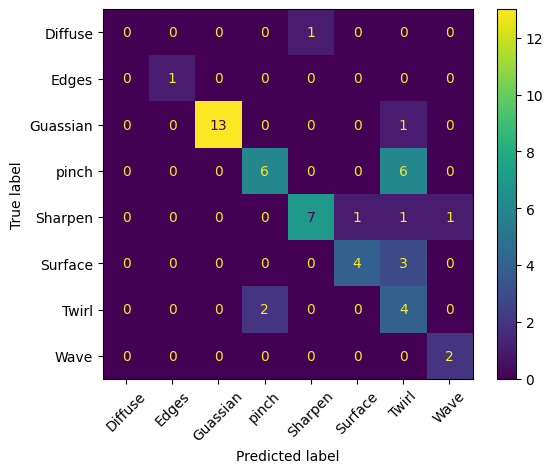

In [14]:
conf_matrix = confusion_matrix(y_true, y_pred)
labels = ["Diffuse", "Edges", "Guassian", "pinch", "Sharpen", "Surface", "Twirl", "Wave"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = labels)
disp.plot()
plt.xticks(rotation = 45) 
plt.show()

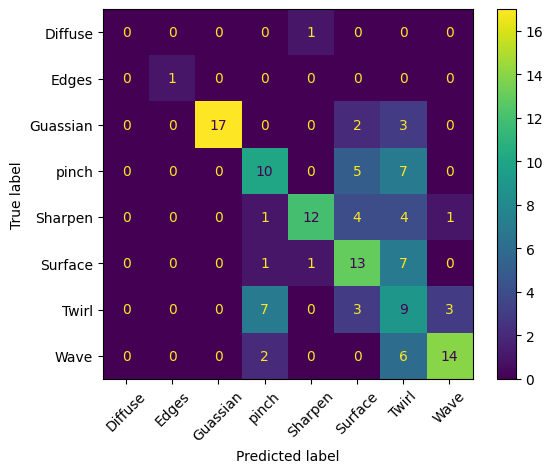

In [22]:
conf_matrix = confusion_matrix(y_true_m, y_pred_m)
labels = ["Diffuse", "Edges", "Guassian", "pinch", "Sharpen", "Surface", "Twirl", "Wave"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = labels)
disp.plot()
plt.xticks(rotation = 45) 
plt.show()

In [19]:
from torch.utils.data import random_split
from sklearn import preprocessing

path_pair_img = '../data/photoshoptest_handmade_test'

test_data = datasets.ImageFolder(root=path_pair_img, transform=preprocess)

y_true = []
y_score = []

for img, y in test_data : 

    
    image_tensor = preprocess(img).unsqueeze(0)
    image_tensor = image_tensor.cuda()

    with torch.no_grad() : 
        output_1 = model_resnet_1(image_tensor)
        output_2 = model_resnet_2(image_tensor)
        output_3 = model_resnet_3(image_tensor)

    

    score_m = output_1 + output_2 + output_3
    
    score_m = nnf.softmax(score_m, dim=1)

    y_score.append(score_m[0].tolist())
    y_true.append(y)


c:\Users\Nassim\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [28]:
x = get_performance(y_true, y_score)

[       nan        nan 1.         0.47619048 0.8        0.48148148
 0.25       0.77777778]


c:\Users\Nassim\Desktop\Stage_DISCO\Photoshop\models\utils.py:49: RuntimeWarning: invalid value encountered in divide
  print((tp + tn)/(tp + fp + fn + tn))


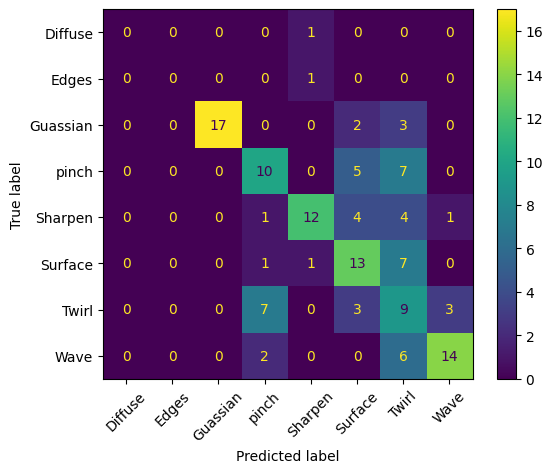

In [25]:
conf_matrix = x[5]
labels = ["Diffuse", "Edges", "Guassian", "pinch", "Sharpen", "Surface", "Twirl", "Wave"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = labels)
disp.plot()
plt.xticks(rotation = 45) 
plt.show()